<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [20]:
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Connect to the database.


In [21]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [22]:
import pandas as pd

## Demo: How to run an sql query


In [23]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [24]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [25]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [26]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [28]:
QUERY = """
SELECT ConvertedComp as count
FROM master
"""
df_cc = pd.read_sql_query(QUERY,conn)
df_cc.head()

,count
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0


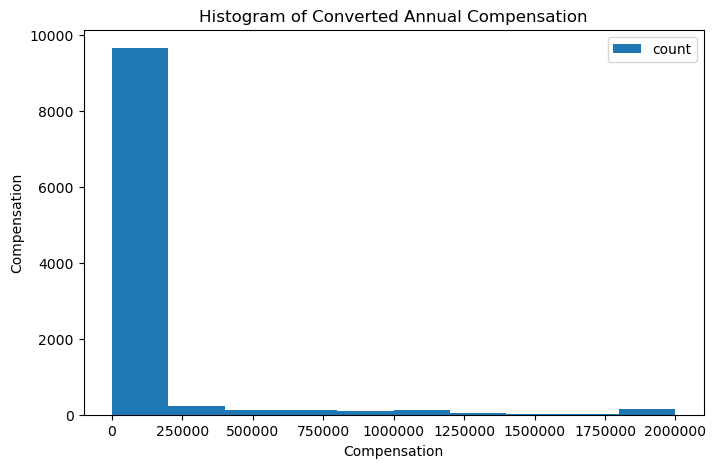

In [29]:
df_cc.plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Converted Annual Compensation') # add a title to the histogram
plt.ylabel("Compensation") # add y-label
plt.xlabel('Compensation') # add x-label
plt.ticklabel_format(axis='x', style='plain')
plt.show()

### Box Plots


Plot a box plot of `Age.`


In [30]:
QUERY = """
SELECT age as count
FROM master
"""

df_age = pd.read_sql_query(QUERY,conn)
df_age.head()

,count
0,22.0
1,23.0
2,28.0
3,26.0
4,29.0


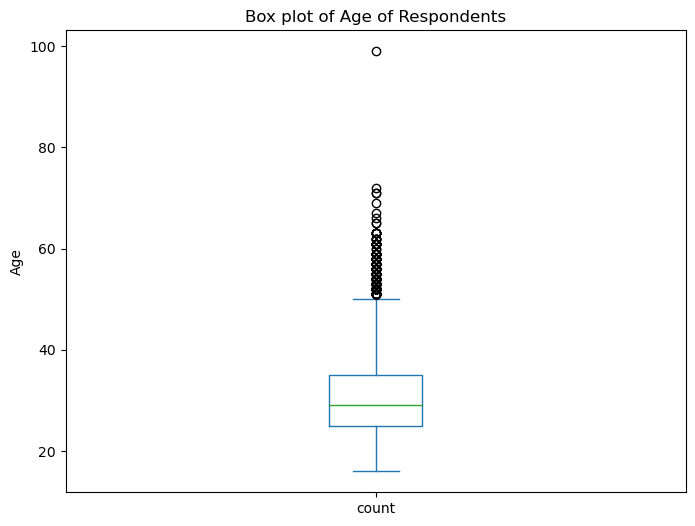

In [31]:
df_age.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Age of Respondents')
plt.ylabel('Age')

plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [32]:
QUERY = """
SELECT age,WorkWeekHrs
FROM master
"""
df_scat = pd.read_sql_query(QUERY,conn)
df_scat.head()

,Age,WorkWeekHrs
0,22.0,80.0
1,23.0,32.0
2,28.0,40.0
3,26.0,40.0
4,29.0,45.0


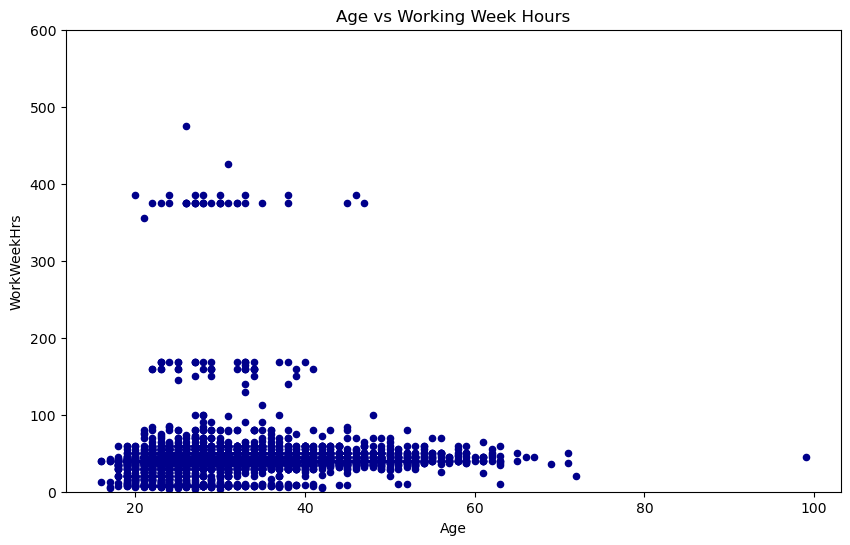

In [33]:
df_scat.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10, 6), color='darkblue')

plt.title('Age vs Working Week Hours')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.ylim(0,600)
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [34]:
QUERY = """
SELECT Age,CodeRevHrs,WorkWeekHrs
FROM master
"""
df_scat = pd.read_sql_query(QUERY,conn)
df_scat.head()

,Age,CodeRevHrs,WorkWeekHrs
0,22.0,NaN,80.0
1,23.0,12.0,32.0
2,28.0,5.0,40.0
3,26.0,NaN,40.0
4,29.0,5.0,45.0


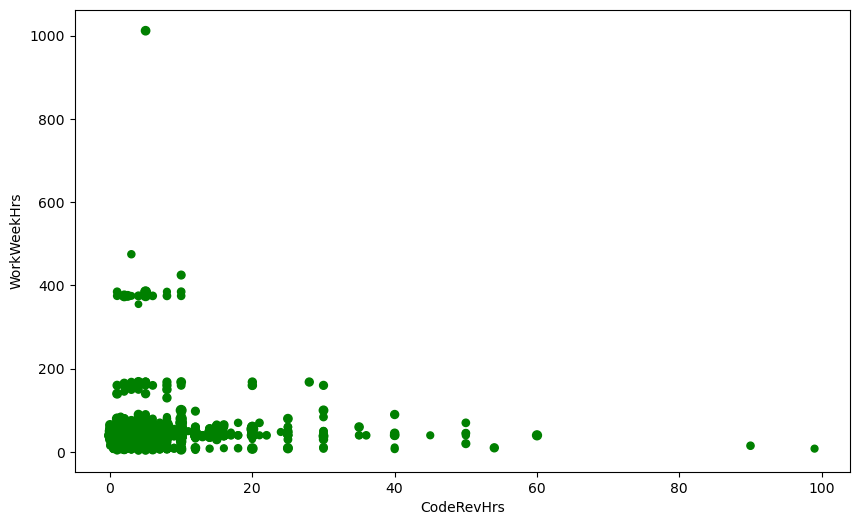

In [35]:
df_scat.plot(kind='scatter', x='CodeRevHrs', y='WorkWeekHrs', s = "Age", figsize=(10, 6), color='green')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [36]:
QUERY = """
  SELECT DatabaseDesireNextYear, COUNT(*) AS desired_DB_count
    FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY desired_DB_count DESC
   LIMIT 5
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
top5_db = pd.read_sql_query(QUERY,conn)
top5_db = top5_db.set_index('DatabaseDesireNextYear')
top5_db

,desired_DB_count
DatabaseDesireNextYear,
PostgreSQL,4328
MongoDB,3649
Redis,3331
MySQL,3281
Elasticsearch,2856


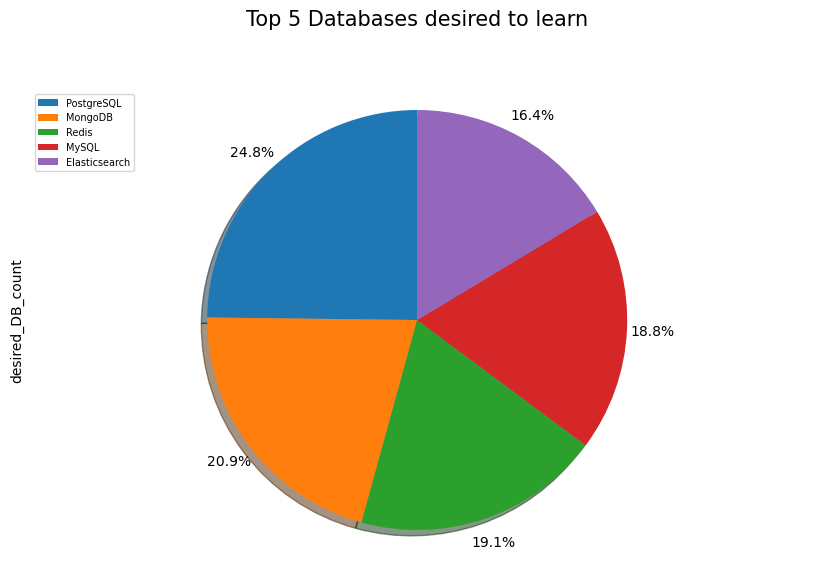

In [37]:
top5_db.plot(kind='pie',x="DatabaseDesireNextYear",y="desired_DB_count",
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Top 5 Databases desired to learn', y=1.12, fontsize = 15) 

plt.axis('equal') 

# add legend
plt.legend(labels=top5_db.index, loc='upper left', fontsize=7) 

plt.show()

In [38]:
QUERY = """
  SELECT LanguageDesireNextYear, COUNT(*) AS desired_lang_count
    FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY desired_lang_count DESC
   LIMIT 10
"""
top5_lang = pd.read_sql_query(QUERY,conn)
top5_lang

,LanguageDesireNextYear,desired_lang_count
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088
5,C#,3591
6,Bash/Shell/PowerShell,3097
7,Java,2953
8,Go,2759
9,Kotlin,1890


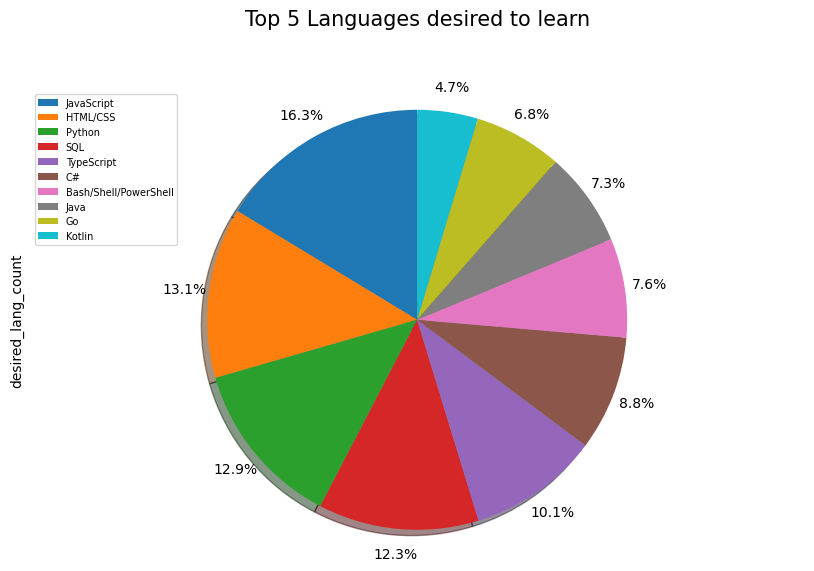

In [39]:
top5_lang.plot(kind='pie',x="LanguageDesireNextYear",y="desired_lang_count",
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Top 5 Languages desired to learn', y=1.12, fontsize = 15) 

plt.axis('equal') 

# add legend
plt.legend(labels = top5_lang["LanguageDesireNextYear"], loc='upper left', fontsize=7) 

plt.show()

In [40]:
QUERY = """
  SELECT LanguageWorkedWith, COUNT(*) AS desired_lang_count
    FROM LanguageWorkedWith
   WHERE LanguageWorkedWith = "SQL"
"""
print(pd.read_sql_query(QUERY,conn))

QUERY = """
  SELECT *
    FROM LanguageWorkedWith
   WHERE UPPER(LanguageWorkedWith) = "MYSQL"
"""
print(pd.read_sql_query(QUERY,conn))

  LanguageWorkedWith  desired_lang_count
0                SQL                7106
Empty DataFrame
Columns: [Respondent, LanguageWorkedWith]
Index: []


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [41]:
QUERY = """
  SELECT age,WorkWeekHrs,CodeRevHrs
    FROM master
WHERE AGE BETWEEN 30 AND 35
"""
stk_df = pd.read_sql_query(QUERY,conn)
stk_df = stk_df.groupby("Age")[["WorkWeekHrs","CodeRevHrs"]].median()
stk_df.head()

,WorkWeekHrs,CodeRevHrs
Age,,
30.0,40.0,4.0
31.0,40.0,4.0
32.0,40.0,4.0
33.0,40.0,4.0
34.0,40.0,4.0


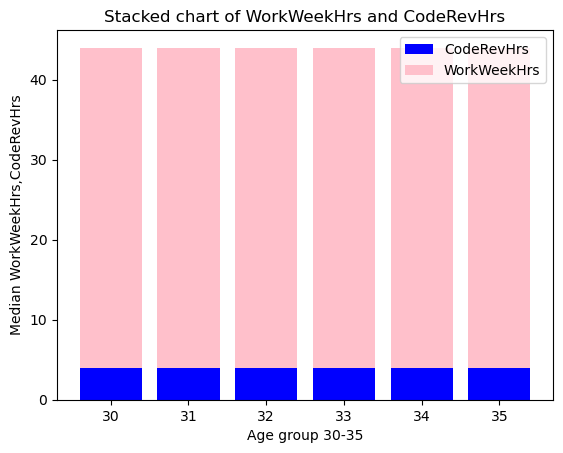

In [42]:
# plot bars in stack manner
plt.bar(stk_df.index, stk_df["CodeRevHrs"], color='b')
plt.bar(stk_df.index, stk_df["WorkWeekHrs"], bottom=stk_df["CodeRevHrs"],color='pink')
plt.title("Stacked chart of WorkWeekHrs and CodeRevHrs")
plt.xlabel("Age group 30-35")
plt.ylabel("Median WorkWeekHrs,CodeRevHrs")
plt.legend(["CodeRevHrs", "WorkWeekHrs"])
plt.show()

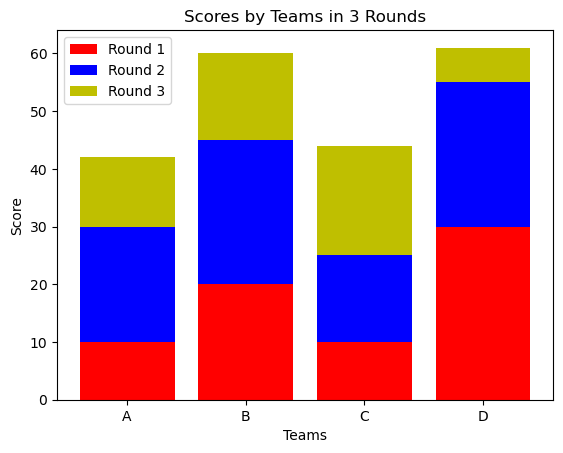

In [43]:
# create data
x = ['A', 'B', 'C', 'D']
y1 = np.array([10, 20, 10, 30])
y2 = np.array([20, 25, 15, 25])
y3 = np.array([12, 15, 19, 6])
 
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.xlabel("Teams")
plt.ylabel("Score")
plt.legend(["Round 1", "Round 2", "Round 3"])
plt.title("Scores by Teams in 3 Rounds")
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<Axes: xlabel='Age'>

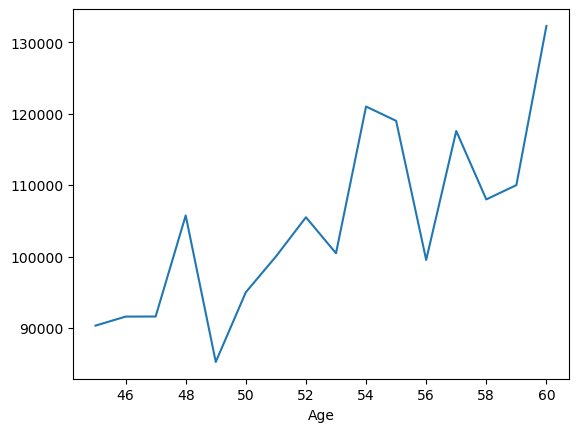

In [44]:
QUERY = """
  SELECT age,ConvertedComp
    FROM master
WHERE AGE BETWEEN 45 AND 60
"""
age_df = pd.read_sql_query(QUERY,conn)
age_df = age_df.groupby("Age")["ConvertedComp"].median()
age_df.plot()

<Axes: xlabel='Age'>

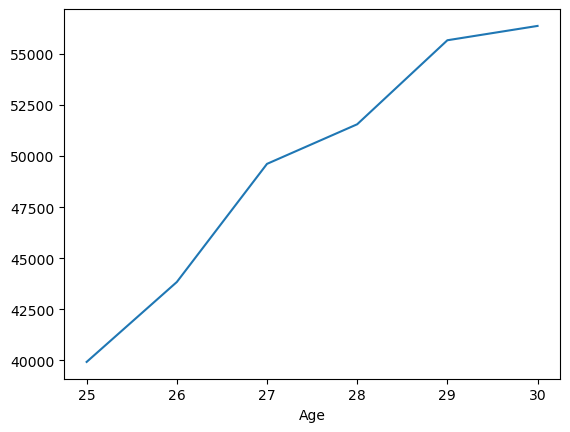

In [45]:
QUERY = """
  SELECT age,ConvertedComp
    FROM master
WHERE AGE BETWEEN 25 AND 30
"""
age_df = pd.read_sql_query(QUERY,conn)
age_df = age_df.groupby("Age")["ConvertedComp"].median()
age_df.plot()

In [46]:
QUERY = """
  SELECT DevType, COUNT(*) AS DevType_Count
    FROM DevType
GROUP BY DevType
ORDER BY DevType_Count DESC
"""
dev_df = pd.read_sql_query(QUERY,conn)
dev_df

,DevType,DevType_Count
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


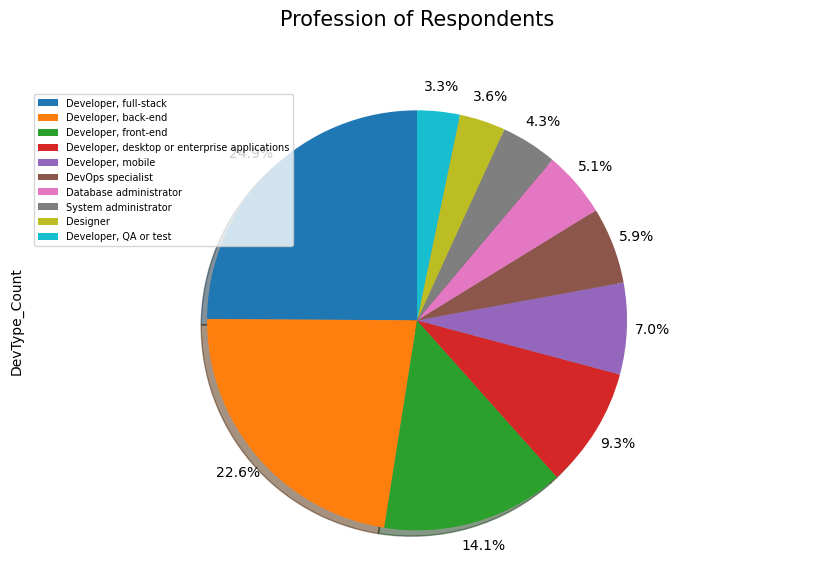

In [47]:
dev_df.head(10).plot(kind='pie',x="DevType",y="DevType_Count",
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Profession of Respondents', y=1.12, fontsize = 15) 

plt.axis('equal') 

# add legend
plt.legend(labels=dev_df["DevType"], loc='upper left', fontsize=7) 

plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<Axes: ylabel='MainBranch'>

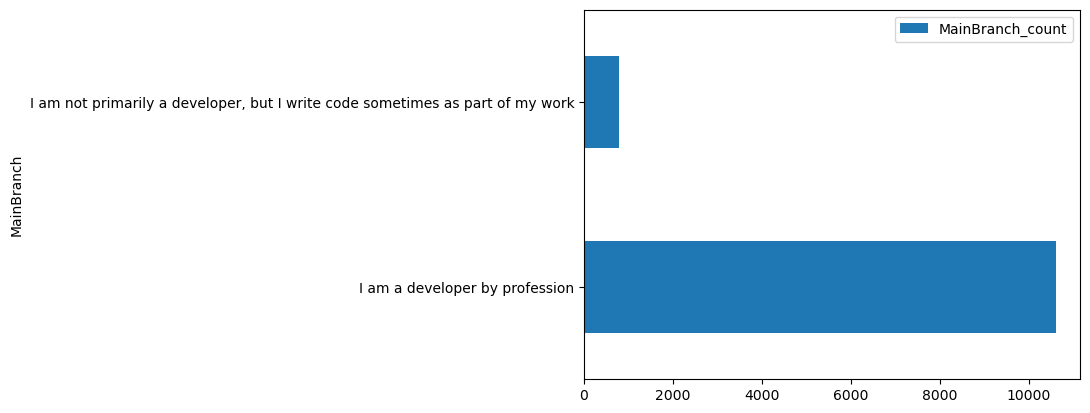

In [48]:
QUERY = """
  SELECT MainBranch, count(*) as MainBranch_count
    FROM master
    group by MainBranch
"""
dev_df = pd.read_sql_query(QUERY,conn)
dev_df = dev_df.set_index("MainBranch")
dev_df.plot(kind="barh")

Close the database connection.


In [49]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
